In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [2]:
from tensorflow.keras.preprocessing import sequence
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [3]:
x_train.shape

(25000, 200)

In [4]:
y_test.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
y_test_one_hot.shape

(25000, 2)

In [9]:
y_test_one_hot[1]

array([0., 1.], dtype=float32)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.GRU(32, activation='tanh', return_sequences=False))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 649,474
Trainable params: 649,474
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
checkpoint_filepath = './temp/checkpoint_gru_en'
mc = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', mode='min', 
                     save_weights_only=True, save_best_only=True)

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics='accuracy')

In [16]:
history=model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.1, callbacks=[es, mc])

Epoch 1/20
176/176 [==============================] - 19s 97ms/step - loss: 0.5812 - accuracy: 0.6891 - val_loss: 0.4869 - val_accuracy: 0.7528
Epoch 2/20
176/176 [==============================] - 19s 105ms/step - loss: 0.3223 - accuracy: 0.8664 - val_loss: 0.3155 - val_accuracy: 0.8720
Epoch 3/20
176/176 [==============================] - 18s 100ms/step - loss: 0.2478 - accuracy: 0.9030 - val_loss: 0.3359 - val_accuracy: 0.8664
Epoch 4/20
176/176 [==============================] - 17s 96ms/step - loss: 0.2093 - accuracy: 0.9210 - val_loss: 0.3350 - val_accuracy: 0.8576
Epoch 5/20
176/176 [==============================] - 18s 101ms/step - loss: 0.1860 - accuracy: 0.9312 - val_loss: 0.3043 - val_accuracy: 0.8724
Epoch 6/20
176/176 [==============================] - 18s 102ms/step - loss: 0.1676 - accuracy: 0.9400 - val_loss: 0.3165 - val_accuracy: 0.8716
Epoch 7/20
176/176 [==============================] - 20s 114ms/step - loss: 0.1519 - accuracy: 0.9445 - val_loss: 0.3486 - val_accu

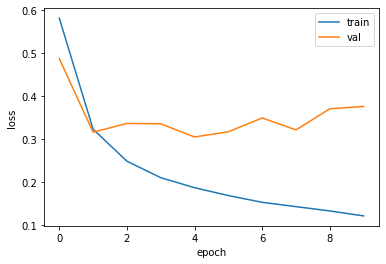

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
model.load_weights(checkpoint_filepath)

In [19]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 13s 16ms/step - loss: 0.3223 - accuracy: 0.8683


In [20]:
print('test_acc:', test_acc)

test_acc: 0.8683199882507324


In [31]:
preds = model.predict(x_test)

782/782 [==============================] - 11s 14ms/step


In [32]:
preds[0]

array([0.9835422 , 0.01645776], dtype=float32)

In [33]:
import numpy as np
labels=[0,1]
preds1 = [labels[np.argmax(probs)] for probs in preds]

In [34]:
preds1[0]

0

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds1)

array([[10905,  1595],
       [ 1663, 10837]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12500
           1       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

